# Encoder - Celltype-Assay embedding model 

This is the first attempt to autoencode the protein assays. This experiment is run on a subset of celltypes and assays which are meaured over chromosome 21, namely:

1. E001-H3K4me1
2. E001-H3K4me3
3. E001-H3K9ac
4. E001-H3K9me3
5. E002-H3K4me1
6. E002-H3K4me3
7. E002-H3K9ac
8. E002-H3K9me3

The model consists of the following:

1. Celltype-Assay embedding layer (CA embedding)
This layer creates an embedding based on the *vocabulary size* i.e number of celltype-assay combinations.

2. Encoder LSTM 
Each protein assay is at 25 base-pair resolution and divided into a sequence of 100 positions and fed into the LSTM. Each positon generates a *hidden state (h)* which is concatenated with the CA embedding and fed into as *cell state (c)* of the decoder at the corresponding positions. Also, the final *hidden state* at the end of 100 positions is concatenated with the CA embedding and initialized as the *hidden state* of the decoder and carried forward as the initial *hidden state* of the encoder for the next 100 positions.     

3. Decoder LSTM
The initialized *hidden states* and *cell states* are used to autoencode the assay at the corresponding 100 positions. 


The details regarding the encoder, decoder and CA embedding size are mentioned in the config file under the *model* directory. The code is in the *src* subdirectory. The tensorboard graphs can be found in the *model/t_log* subdirectory.  

## Interesting Results 

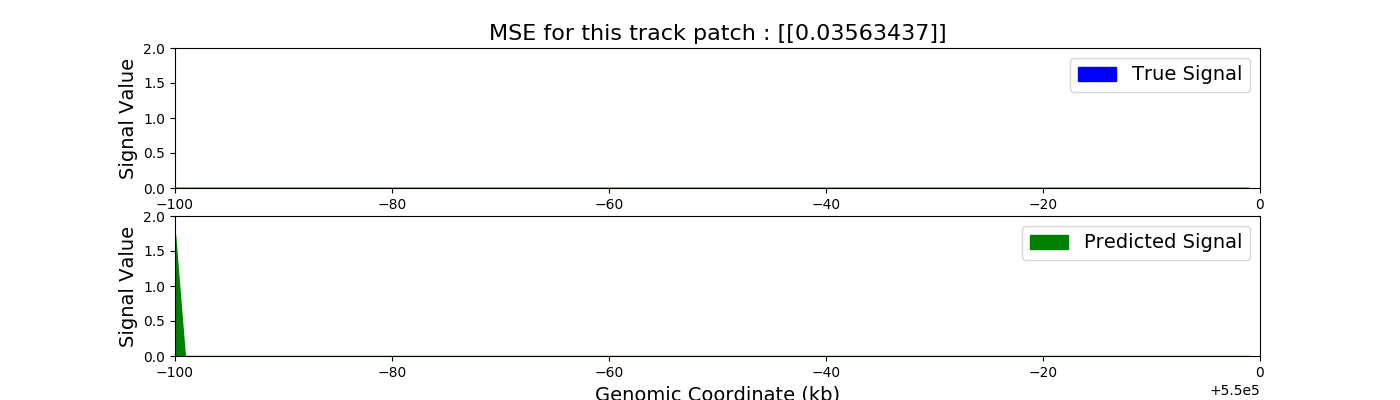

For most of the CA combinations, the model is predicting a spike at the start of the track (for every 100 track cut). This is peculiar and could be because of the way hidden states are being carried over in the current model.  

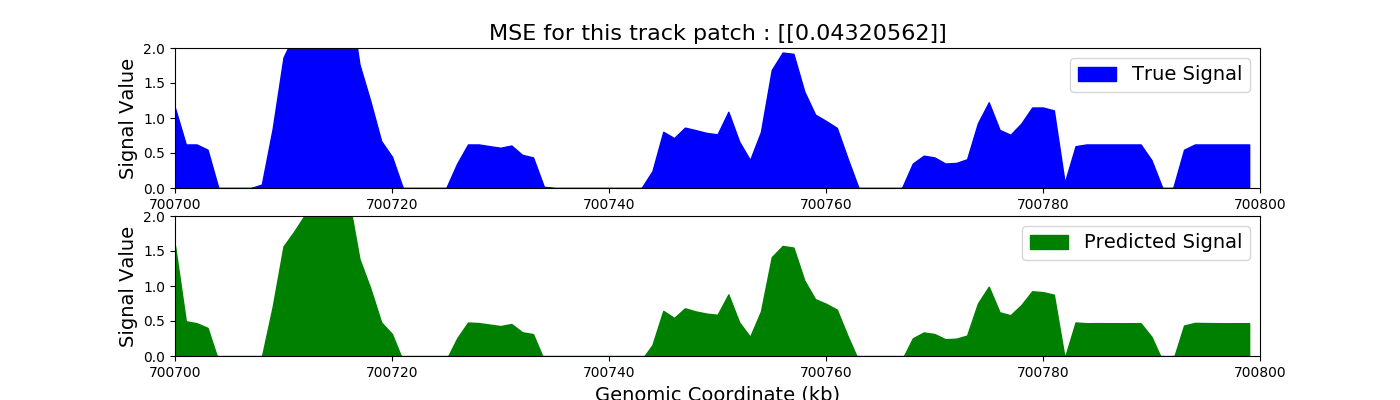

For the most part the model is able to autoencode well across CA types. It is seen that the predicted signal is slightly lesser than the true signal (about 0.15). This could be because of dearth of training. The trainining was done for 3 epochs and a larger number of epochs should see a better performance. Some similar results are given below: 

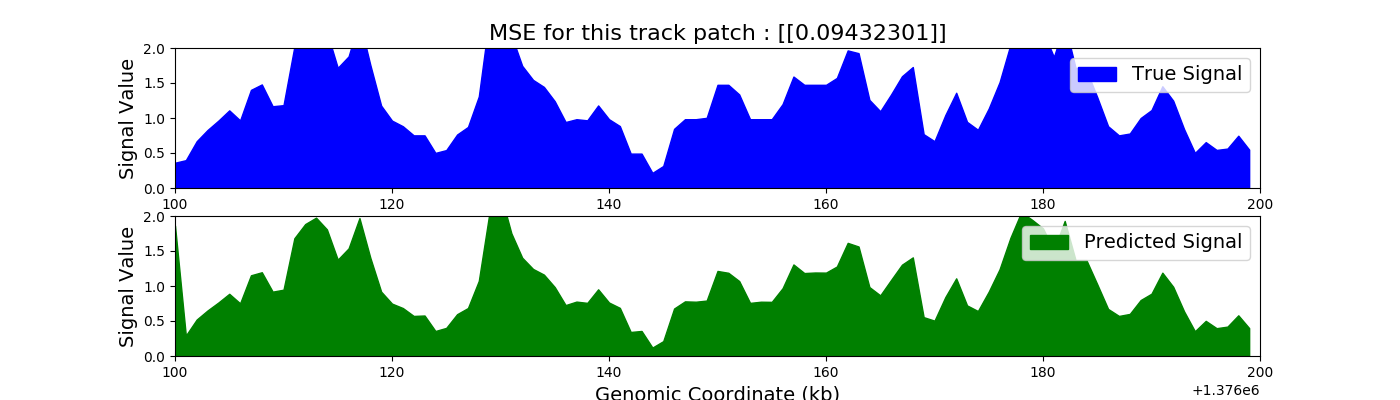

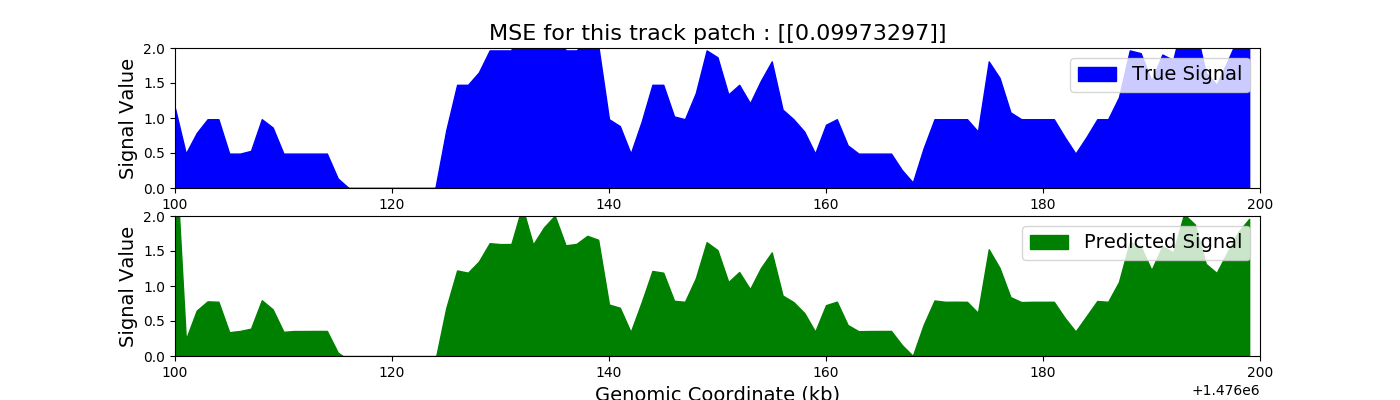

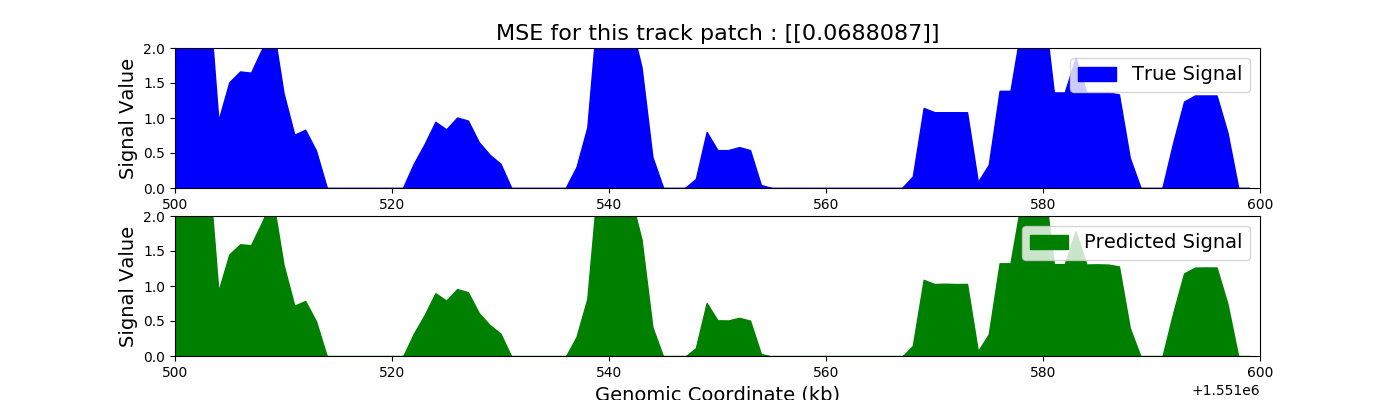

One other peculiar behaviour of the model was that it seemed to be agnostic to the CA embedding. Apart from the 8 CA types mentioned above, I had kept aside some others for testing purposes, namely:

1. E001-H3K27me3
2. E001-H3K36me3
3. E002-H3K27me3
4. E002-H3K36me3

I had forgotten to give them separate ID's in order to create an unique CA embedding and ended up running the model with similar ID's as the training data. However, the model was still able to autoencode well, leading me to believe that the model is not learning much from the CA embedding but rather has most of its power in the encoder and decoder. Some of the ways this can be avoided is:

1. Forcing the model to learn from the CA embedding by not feeding it at every time step but only at the bottleneck. 
2. Reducing the size of the hidden vector of the LSTM so as to reduce its expressive power 
3. Try averaging instead of concatenating 

Some examples: 

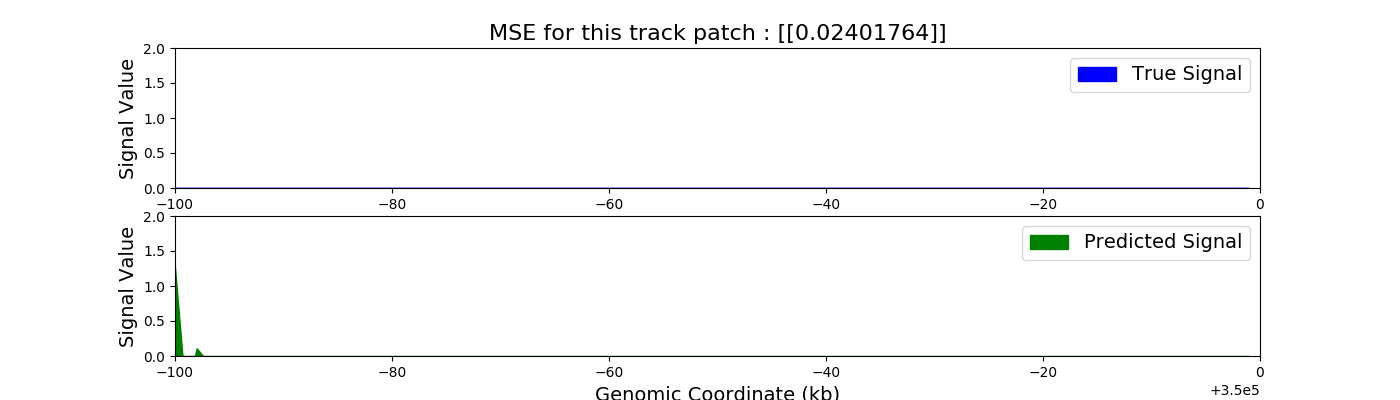

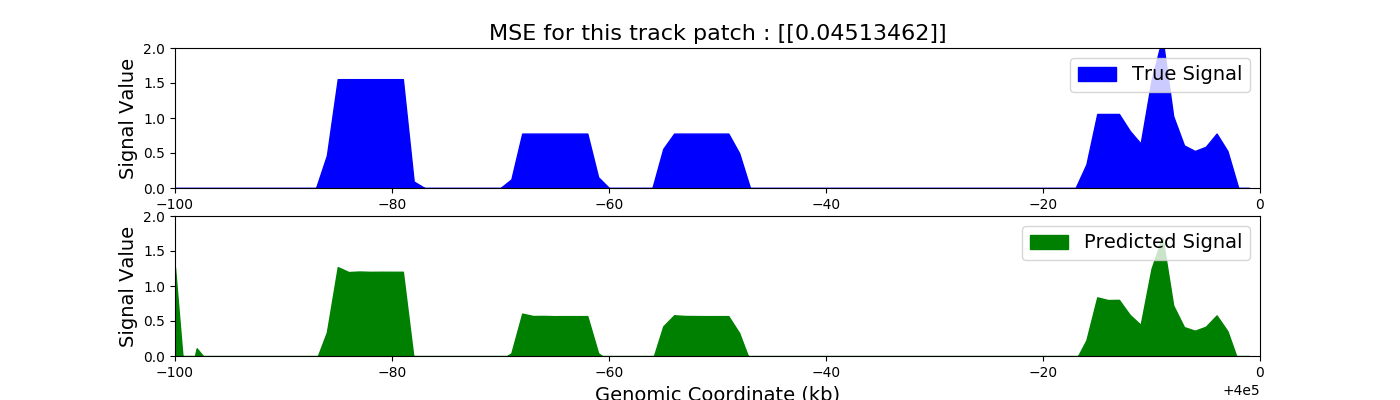

### Meeting minutes

Some resources to be looked at:
1. https://genome.ucsc.edu/encode/pilot.html
2. https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000424

To be tried:
1. A 2-D model where each genomic position encodes all tracks at that position